In [10]:
import pandas as pd
df = pd.read_csv('../deeplearning/data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [11]:
X = df.iloc[:,0:12]
y = df.iloc[:, 12]

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

def model_fn():

    model = Sequential()

    model.add(Dense(30, input_dim=12, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model
model = model_fn()
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=500, 
                    validation_split=0.25)

score = model.evaluate(X_test, y_test)

print(f'Test_accuracy: {score[1]}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                390       
                                                                 
 dense_10 (Dense)            (None, 12)                372       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/8 [==>...........................] - ETA: 2s - loss: 31.8513 - accuracy: 0.1960

2022-08-17 11:23:56.551834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 44ms/step - loss: 25.2888 - accuracy: 0.2325 - val_loss: 18.6333 - val_accuracy: 0.2415
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 14.3324 - accuracy: 0.1999 - val_loss: 8.3583 - val_accuracy: 0.1454


2022-08-17 11:23:56.927124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 5.0969 - accuracy: 0.1547 - val_loss: 1.3832 - val_accuracy: 0.4131
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.8397 - accuracy: 0.6859 - val_loss: 0.8079 - val_accuracy: 0.7569
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.8242 - accuracy: 0.7744 - val_loss: 0.8459 - val_accuracy: 0.7715
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.7924 - accuracy: 0.7880 - val_loss: 0.7213 - val_accuracy: 0.7969
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6444 - accuracy: 0.8201 - val_loss: 0.5374 - val_accuracy: 0.8354
Epoch 8/50
8/8 [==============================] - 0s 11ms/step - loss: 0.4629 - accuracy: 0.8596 - val_loss: 0.3685 - val_accuracy: 0.8900
Epoch 9/50
8/8 [==============================] - 0s 11ms/step - loss: 0.3330 - accuracy: 0.8994 - val_loss: 0.2855 - val_accuracy: 0.8962
Epoch 10/50
8/8 [==========

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25, verbose=0,
                    callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print(f'test_accuray: {score[1]}')



Epoch 1: saving model to ./data/model/all/01-0.9485.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9492.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9508.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9500.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9538.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9538.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9554.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9546.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9554.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9546.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9554.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9562.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9554.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9562.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9562.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9554.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9562.hdf5

Epoch

In [14]:
model = model_fn()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

hist_df = pd.DataFrame(history.history)
hist_df

Epoch 1/2000
1/8 [==>...........................] - ETA: 2s - loss: 28.3190 - accuracy: 0.2460

2022-08-17 11:24:25.518426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 44ms/step - loss: 25.2963 - accuracy: 0.2304 - val_loss: 18.6131 - val_accuracy: 0.2377
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 14.3153 - accuracy: 0.1989 - val_loss: 8.3556 - val_accuracy: 0.1462
Epoch 3/2000


2022-08-17 11:24:25.891530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 12ms/step - loss: 5.0976 - accuracy: 0.1591 - val_loss: 1.3786 - val_accuracy: 0.4169
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.8418 - accuracy: 0.6851 - val_loss: 0.8077 - val_accuracy: 0.7585
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.8251 - accuracy: 0.7747 - val_loss: 0.8461 - val_accuracy: 0.7738
Epoch 6/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.7939 - accuracy: 0.7911 - val_loss: 0.7170 - val_accuracy: 0.7977
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.6408 - accuracy: 0.8209 - val_loss: 0.5345 - val_accuracy: 0.8377
Epoch 8/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4639 - accuracy: 0.8599 - val_loss: 0.3657 - val_accuracy: 0.8892
Epoch 9/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3307 - accuracy: 0.9015 - val_loss: 0.2850 - val_accuracy: 0.8985
Epoch 10/2000
8/8 [=======

,loss,accuracy,val_loss,val_accuracy
0,25.296270,0.230434,18.613138,0.237692
1,14.315310,0.198871,8.355612,0.146154
2,5.097635,0.159097,1.378567,0.416923
3,0.841785,0.685142,0.807655,0.758462
4,0.825110,0.774698,0.846085,0.773846
...,...,...,...,...
1995,0.031200,0.991275,0.058909,0.984615
1996,0.032524,0.990762,0.058211,0.983846
1997,0.031879,0.990762,0.059319,0.986923
1998,0.030952,0.990762,0.057056,0.984615


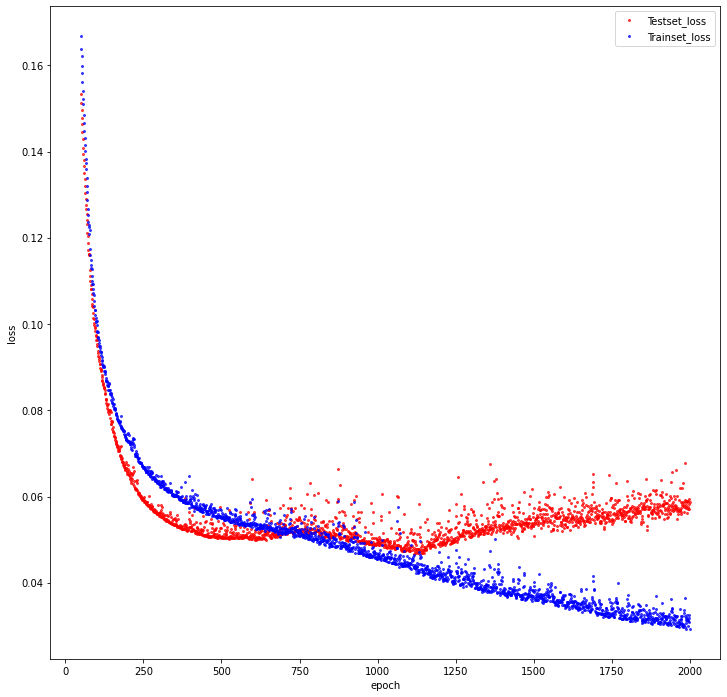

In [25]:
import matplotlib.pyplot as plt
import numpy as np

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.figure(figsize=(12, 12))

plt.plot(x_len[50:], y_vloss[50:], 'o', c='red', markersize=2, label="Testset_loss", alpha=0.7)
plt.plot(x_len[50:], y_loss[50:], 'o', c='blue', markersize=2, label="Trainset_loss", alpha=0.7)

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()